# Phân tích dữ liệu từ báo cáo tài chính và giá cổ phiếu của Công ty Cổ phần FPT trong thời gian 5 năm trở lại đây

## 1. Quan sát dữ liệu để hiểu doanh nghiệp

Import các thư viện cần thiết:
- **numpy**: Thư viện hỗ trợ các phép toán số học, ma trận và mảng đa chiều.
- **pandas**: Thư viện xử lý dữ liệu dạng bảng, hỗ trợ đọc/ghi CSV, Excel và các thao tác dữ liệu.
- **seaborn**: Thư viện vẽ biểu đồ thống kê dựa trên matplotlib, cung cấp giao diện dễ sử dụng và đẹp mắt.
- **matplotlib.pyplot**: Thư viện vẽ biểu đồ cơ bản trong Python.
- **pathlib**: Thư viện xử lý đường dẫn file, giúp làm việc với file cross-platform.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

ROOT = Path().resolve()

Tạo đường dẫn tới 2 file csv cần phân tích. Để dễ xử lý, 2 file csv được tải về đã được xóa thủ công các hàng tiêu đề, thông tin không mang dữ liệu cần thiết.

In [2]:
financial_indicator_path = f"{ROOT}/Simplize_FPT_FinancialIndicator_20250315.csv"
price_history_path = f"{ROOT}/Simplize_FPT_PriceHistory_20250315.csv"

Do dữ liệu từ csv sau khi tải về có dạng chuỗi, chứa các dấu phẩy hàng nghin và dấu % nên ta cần chuẩn hóa lại các cột về dạng số có thể xử lý

In [3]:
def convert_columns_to_numeric(df):
    df = df.copy() 
    
    for col in df.columns[1:]:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.replace('%', '', regex=False)
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

Hàm tóm tắt các chỉ số:
- Five-number summary
    - Giá trị nhỏ nhất – min
    - Tứ phân vị thứ nhất – Q1
    - Trung vị – median hay tứ phân vị thứ hai – Q2
    - Tứ phân vị thứ ba – Q3
    - Giá trị lớn nhất – max
- Trung bình (mean)
- Độ lệch chuẩn (standard deviation)
- Phương sai (variance).

In [4]:
def print_summary(df, name):
    print(f"Tóm tắt các chỉ số thống kê của Bảng {name}:")
    summary = pd.DataFrame({
        'Min': df.min(),
        'Q1': df.quantile(0.25),
        'Median': df.median(),
        'Q3': df.quantile(0.75),
        'Max': df.max(),
        'Mean': df.mean(),
        'Std': df.std(),
        'Var': df.var()
    })
    display(summary)

### Quan sát dữ liệu của Báo cáo tài chính theo quý

Tại file báo cáo tài chính của FPT, dữ liệu được biểu diễn theo dạng: các hàng là các chỉ số và các cột là các mốc thời gian (theo đơn vị quý). Để dễ dàng phân tích, ta cần **chuyển vị** (đổi các hàng lên thành cột và ngược lại), khi đó mỗi hàng sẽ là các chỉ số tương ứng của từng quý. Ngoài ra, cần phải sửa lại chỉ số index cho bảng lúc này là QUÝ.

In [ ]:
df_fi = pd.read_csv(financial_indicator_path).T
df_fi.columns = df_fi.iloc[0].str.strip()
df_fi = df_fi.drop(df_fi.index[0])
df_fi.reset_index(inplace=True), 
df_fi.rename(columns={'index': 'QUÝ'}, inplace=True)
df_fi = convert_columns_to_numeric(df_fi)

print("Báo cáo tài chính FPT:")
print(f"Bảng gồm {df_fi.shape[0]} dòng và {df_fi.shape[1]} cột")
display(df_fi.head(5))

Báo cáo tài chính FPT:
Bảng gồm 40 dòng và 55 cột


Unnamed: 0,QUÝ,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,...,Nợ phải trả / Vốn chủ sở hữu,"Vay và nợ thuê tài chính ngắn hạn, dài hạn / Vốn chủ sở hữu",Nợ vay ròng / Vốn chủ sở hữu,Tổng tài sản / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP)
0,Q4/2024,1.760782e+13,19.86,6.478973e+12,15.04,2.922047e+12,22.43,2.959667e+12,21.54,2.086993e+12,...,101.17,41.76,-45.13,2.01,1.99,1.25,0.89,27.90,2.063910e+14,1.471069e+09
1,Q3/2024,1.590282e+13,15.56,6.158956e+12,12.05,2.948226e+12,20.91,2.908621e+12,19.74,2.088852e+12,...,91.10,41.41,-36.00,2.03,2.10,1.31,0.88,28.58,2.212488e+14,1.471069e+09
2,Q2/2024,1.524523e+13,22.11,5.651357e+12,21.96,2.640453e+12,20.58,2.668969e+12,20.33,1.875159e+12,...,99.43,50.41,-31.31,2.05,2.01,1.24,0.85,22.98,1.964303e+14,1.460448e+09
3,Q1/2024,1.409293e+13,20.64,5.510466e+12,20.64,2.515527e+12,19.96,2.533582e+12,19.47,1.798031e+12,...,95.49,52.04,-25.41,1.92,2.05,1.23,0.85,23.86,1.987670e+14,1.460448e+09
4,Q4/2023,1.469041e+13,12.64,5.631864e+12,7.45,2.386698e+12,20.65,2.435093e+12,22.43,1.728400e+12,...,101.43,46.90,-34.52,2.03,1.99,1.18,0.82,16.06,1.429985e+14,1.269969e+09


In [6]:
print_summary(df_fi.select_dtypes(include=[np.number]), "Báo cáo tài chính FPT")

Tóm tắt các chỉ số thống kê của Bảng Báo cáo tài chính FPT:


,Min,Q1,Median,Q3,Max,Mean,Std,Var
Unnamed: 0,,,,,,,,
Doanh thu thuần,4.750769e+12,7.578028e+12,9.472792e+12,1.186093e+13,1.760782e+13,9.903009e+12,3.052926e+12,9.320354e+24
Tăng trưởng doanh thu,-4.956000e+01,8.000000e-02,1.496500e+01,2.019750e+01,2.826000e+01,5.309250e+00,2.239155e+01,5.013813e+02
Lợi nhuận gộp,1.686151e+12,2.263643e+12,2.818775e+12,4.160648e+12,6.478973e+12,3.310457e+12,1.378233e+12,1.899526e+24
Tăng trưởng lợi nhuận gộp,-1.772000e+01,8.247500e+00,1.586000e+01,2.290250e+01,3.658000e+01,1.496200e+01,1.215606e+01,1.477698e+02
Lợi nhuận thuần từ HĐKD,5.547813e+11,8.705371e+11,1.307723e+12,1.936163e+12,2.948226e+12,1.437409e+12,6.875962e+11,4.727885e+23
Tăng trưởng lợi nhuận thuần,-4.348000e+01,1.346500e+01,2.006000e+01,2.233000e+01,9.493000e+01,1.790950e+01,1.828760e+01,3.344364e+02
Lợi nhuận trước thuế,5.627456e+11,8.819801e+11,1.326982e+12,1.952403e+12,2.959667e+12,1.453856e+12,6.895066e+11,4.754193e+23
Tăng trưởng lợi nhuận trước thuế,-4.256000e+01,1.293500e+01,1.943000e+01,2.201000e+01,9.357000e+01,1.764750e+01,1.810674e+01,3.278542e+02
Lợi nhuận sau thuế của Cổ đông công ty mẹ,3.456900e+11,5.913719e+11,8.924266e+11,1.368612e+12,2.088852e+12,1.002123e+12,5.032327e+11,2.532431e+23


### Quan sát dữ liệu của Báo cáo lịch sử giá cổ phiếu theo ngày

In [7]:
df_ph = pd.read_csv(price_history_path)
df_ph = convert_columns_to_numeric(df_ph)

print("Báo cáo lịch sử giá FPT:")
print(f"Bảng gồm {df_ph.shape[0]} dòng và {df_ph.shape[1]} cột")
display(df_ph.head(5))

Báo cáo lịch sử giá FPT:
Bảng gồm 1000 dòng và 8 cột


,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,14/03/2025,135600.0,136300.0,130800.0,131400.0,-5100.0,-0.04,16094000.0
1,13/03/2025,136100.0,138000.0,136100.0,136500.0,600.0,0.00,3610200.0
2,12/03/2025,137700.0,138700.0,135900.0,135900.0,-1600.0,-0.01,6185000.0
3,11/03/2025,138000.0,138500.0,137000.0,137500.0,-1800.0,-0.01,5784400.0
4,10/03/2025,141500.0,141500.0,139200.0,139300.0,-2100.0,-0.01,5323000.0


In [8]:
print_summary(df_ph.select_dtypes(include=[np.number]), "Báo cáo lịch sử giá FPT")

Tóm tắt các chỉ số thống kê của Bảng Báo cáo lịch sử giá FPT:


,Min,Q1,Median,Q3,Max,Mean,Std,Var
GIÁ MỞ CỬA,38598.73,5.650594e+04,62018.480,9.526288e+04,154100.00,7.868435e+04,3.204726e+04,1.027027e+09
GIÁ CAO NHẤT,38902.65,5.710074e+04,62630.320,9.702105e+04,156000.00,7.951630e+04,3.229124e+04,1.042724e+09
GIÁ THẤP NHẤT,37737.60,5.581089e+04,61543.995,9.434091e+04,153400.00,7.790381e+04,3.180323e+04,1.011445e+09
GIÁ ĐÓNG CỬA,38548.07,5.636835e+04,62028.030,9.558450e+04,154300.00,7.871540e+04,3.204558e+04,1.026919e+09
THAY ĐỔI GIÁ,-7900.00,-6.000000e+02,100.000,9.000000e+02,7800.00,1.634369e+02,1.627268e+03,2.648001e+06
% THAY ĐỔI,-0.05,-1.000000e-02,0.000,1.000000e-02,0.07,1.681901e-03,1.441488e-02,2.077887e-04
KHỐI LƯỢNG,221000.00,1.538375e+06,2553581.000,3.851300e+06,16094000.00,3.058941e+06,2.184421e+06,4.771696e+12


Biểu đồ theo dõi sự biến động giá cổ phiếu.

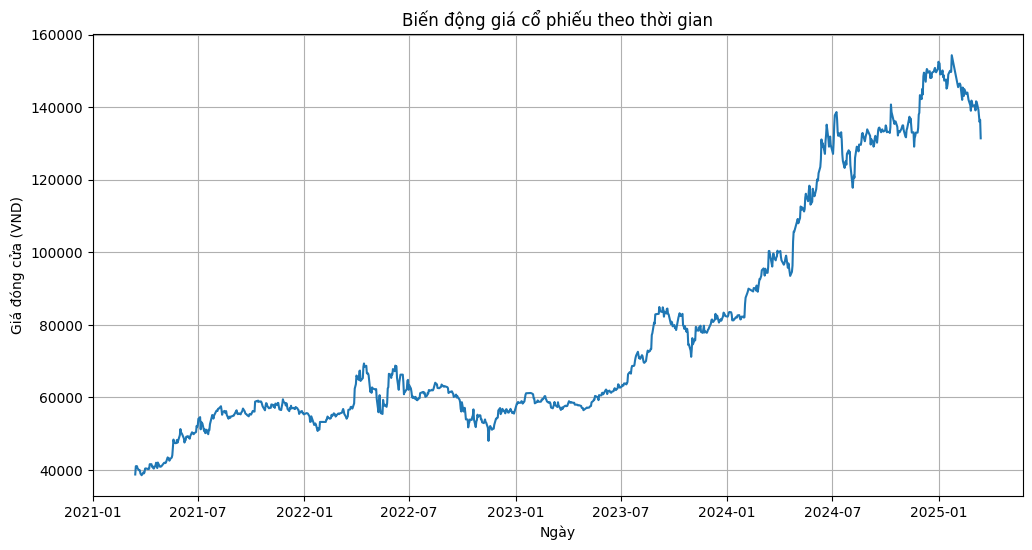

In [9]:
df_ph['NGÀY'] = pd.to_datetime(df_ph['NGÀY'], format='%d/%m/%Y')

plt.figure(figsize=(12, 6))
plt.plot(df_ph['NGÀY'], df_ph['GIÁ ĐÓNG CỬA'])
plt.title('Biến động giá cổ phiếu theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (VND)')
plt.grid(True)
plt.show()


### Kết luận Quan sát Giá Cổ phiếu FPT

Qua quan sát dữ liệu lịch sử giá cổ phiếu FPT từ 2021 đến 2025, một số điểm đáng chú ý:
- **Giai đoạn 2021-2022**: Giá cổ phiếu tăng mạnh nhờ lợi nhuận bền vững và môi trường thị trường thuận lợi, nhưng cuối 2022 có sự điều chỉnh do lãi suất tăng và "mùa đông chứng khoán".  
- **Giai đoạn 2023**: Giá cổ phiếu phục hồi, bắt đầu xu hướng tăng trở lại khi lãi suất giảm và thị trường hồi phục.  
- **Cuối 2024**: Tăng tốc mạnh, đặc biệt sau khi công ty công bố chiến lược AI và hợp tác với NVIDIA, thể hiện sự "tái định giá" cổ phiếu.

Bối cảnh nội tại công ty tác động đến giá:
- **Hiệu quả hoạt động**: Lợi nhuận trước thuế (LNTT) duy trì ~20%/năm, trả cổ tức đều đặn, chứng minh nền tảng tài chính vững chắc.  
- **Chiến lược công nghệ lõi**: Ra mắt chip bán dẫn, AI Factory và hợp tác chiến lược với NVIDIA giúp tạo "nhiên liệu tên lửa" cho giá cổ phiếu.  
- **Mở rộng kinh doanh nước ngoài**: Doanh thu CNTT nước ngoài tăng trưởng mạnh, đạt mốc 1 tỷ USD năm 2023, góp phần tăng kỳ vọng của nhà đầu tư.

Bối cảnh thị trường và yếu tố vĩ mô:
- **Chu kỳ lãi suất và VN-Index**: Lãi suất cao năm 2022 gây áp lực điều chỉnh, ngược lại, lãi suất thấp và VN-Index phục hồi giúp giá cổ phiếu tăng trở lại.  
- **Tình hình ngành và kinh tế vĩ mô**: Giai đoạn thị trường thuận lợi (2021, 2023-2024) khuếch đại đà tăng của cổ phiếu, giai đoạn thị trường bất lợi (2022) làm chậm tốc độ tăng.  
- **Yếu tố đặc thù**: Sự kiện M&A, mở rộng chuỗi Long Châu, các dự án chiến lược về AI và Chip có thể tạo những biến động ngắn hạn nhưng tác động tích cực về lâu dài.

**Kết luận tổng quan:**  
Giá cổ phiếu FPT phản ánh sự kết hợp giữa nền tảng nội tại vững chắc, kỳ vọng chiến lược về công nghệ, và bối cảnh vĩ mô. Các đợt tăng giảm bất thường thường liên quan tới các sự kiện đặc thù và biến động thị trường, nhưng xu hướng dài hạn vẫn tích cực nhờ nền tảng bền vững và kỳ vọng tăng trưởng.


## 2. Tiền xử lý và chọn lọc dữ liệu

### Dữ liệu lấy từ bảng Chỉ số tài chính của công ty
Bao gồm các chỉ số có khả năng ảnh hưởng tới giá cổ phiếu:
- Biên lợi nhuận gộp
- Biên lợi nhuận ròng
- P/E (tỷ lệ giá trên lợi nhuận Price to Earnings Ratio)
- EPS (lợi nhuận trên mỗi cổ phiếu Earnings Per Share)
- Tăng trưởng EPS,
- ROE (tỷ suất sinh lời trên vốn chủ sở hữu)
- Tỷ lệ Nợ phải trả/Vốn chủ sở hữu 
- Khả năng thanh toán tổng quát
- Vòng quay tài sản (Asset turnover ratio)
- Giá trị sổ sách (Book Value Per
Share).

In [10]:
columns_interest = [
    'QUÝ',
    'Biên lợi nhuận gộp',
    'Biên lợi nhuận ròng',
    'P/E',
    'EPS (VNĐ/CP)',
    'Tăng trưởng EPS',
    'ROE LTM',
    'Nợ phải trả / Vốn chủ sở hữu',
    'Khả năng thanh toán tổng quát',
    'Vòng quay tài sản (vòng)',
    'Giá trị sổ sách (VNĐ/CP)'
]

df_fi_selected = df_fi[columns_interest].copy()
print("Báo cáo tài chính sau khi đã được tiền xử lý: ")
display(df_fi_selected.head(5))


Báo cáo tài chính sau khi đã được tiền xử lý: 


Unnamed: 0,QUÝ,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
0,Q4/2024,36.80,14.16,26.89,1418.69,4.24,28.66,101.17,1.99,0.25,20300.16
1,Q3/2024,38.73,15.59,27.02,1419.96,3.68,28.16,91.10,2.10,0.24,20184.50
2,Q2/2024,37.07,15.01,24.72,1283.96,8.04,27.96,99.43,2.01,0.24,18820.48
3,Q1/2024,39.10,15.33,20.59,1231.15,4.69,27.70,95.49,2.05,0.23,18374.07
4,Q4/2023,38.34,13.96,19.32,1360.98,10.46,28.19,101.43,1.99,0.24,19677.77


### Dữ liệu lấy từ bảng Lịch sử giá:
Bao gồm: 
- Mốc thời gian (quý/năm)
- Giá đóng cửa
- Thay đổi giá
- % thay đổi

Trước tiên, cần thêm cột QUÝ cho bảng:

In [11]:
df_ph['QUÝ'] = 'Q' + df_ph['NGÀY'].dt.quarter.astype(str) + '/' + df_ph['NGÀY'].dt.year.astype(str)

df_ph_quarter = df_ph.groupby('QUÝ').agg({
    'NGÀY': 'max',
    'GIÁ ĐÓNG CỬA': 'last',
}).reset_index()

df_ph_quarter = df_ph_quarter.sort_values('NGÀY').reset_index(drop=True)

display(df_ph_quarter.head(5))

,QUÝ,NGÀY,GIÁ ĐÓNG CỬA
0,Q1/2021,2021-03-31,38750.69
1,Q2/2021,2021-06-30,40371.63
2,Q3/2021,2021-09-30,52321.06
3,Q4/2021,2021-12-31,55256.86
4,Q1/2022,2022-03-31,55613.74


Đối với dữ liệu về Lịch sử giá thì tính trung bình dữ liệu của ngày cuối cùng của quý đó và
14 ngày trước và sau ngày đó.

In [12]:
def calculate_average_price(row):
    start_date = row['NGÀY'] - pd.Timedelta(days=14) 
    end_date = row['NGÀY'] + pd.Timedelta(days=14)

    df_filtered = df_ph[(df_ph['NGÀY'] >= start_date) & (df_ph['NGÀY'] <= end_date)]

    return df_filtered['GIÁ ĐÓNG CỬA'].mean()

In [13]:
df_ph_quarter['GIÁ TRUNG BÌNH'] = df_ph_quarter.apply(calculate_average_price, axis=1)
display(df_ph_quarter.head(5))

,QUÝ,NGÀY,GIÁ ĐÓNG CỬA,GIÁ TRUNG BÌNH
0,Q1/2021,2021-03-31,38750.69,40156.954762
1,Q2/2021,2021-06-30,40371.63,51186.021429
2,Q3/2021,2021-09-30,52321.06,56491.778095
3,Q4/2021,2021-12-31,55256.86,55527.495000
4,Q1/2022,2022-03-31,55613.74,62114.899500


Tính lại 2 cột thay đổi giá và % thay đổi giá theo từng quý

In [14]:
df_ph_quarter['THAY ĐỔI GIÁ'] = df_ph_quarter['GIÁ TRUNG BÌNH'].diff()
df_ph_quarter['% THAY ĐỔI GIÁ'] = df_ph_quarter['GIÁ TRUNG BÌNH'].pct_change() * 100
df_ph_quarter.drop(columns=['NGÀY', 'GIÁ TRUNG BÌNH'], inplace=True)

print('Bảng lịch sử giá sau khi tiền xử lý:')
display(df_ph_quarter.head(5))

Bảng lịch sử giá sau khi tiền xử lý:


,QUÝ,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI GIÁ
0,Q1/2021,38750.69,NaN,NaN
1,Q2/2021,40371.63,11029.066667,27.464898
2,Q3/2021,52321.06,5305.756667,10.365636
3,Q4/2021,55256.86,-964.283095,-1.706944
4,Q1/2022,55613.74,6587.404500,11.863320


## 3. Xem xét các yếu tố nguy cơ cho mô hình tài chính

Trong bài tập này chúng ta chỉ xét tới các yếu tố nội tại của chính công ty phát hành cổ phiếu. Để
sàng lọc thì chúng ta cần tính độ tương quan Pearson của các chỉ số tài chính với giá cổ phiếu

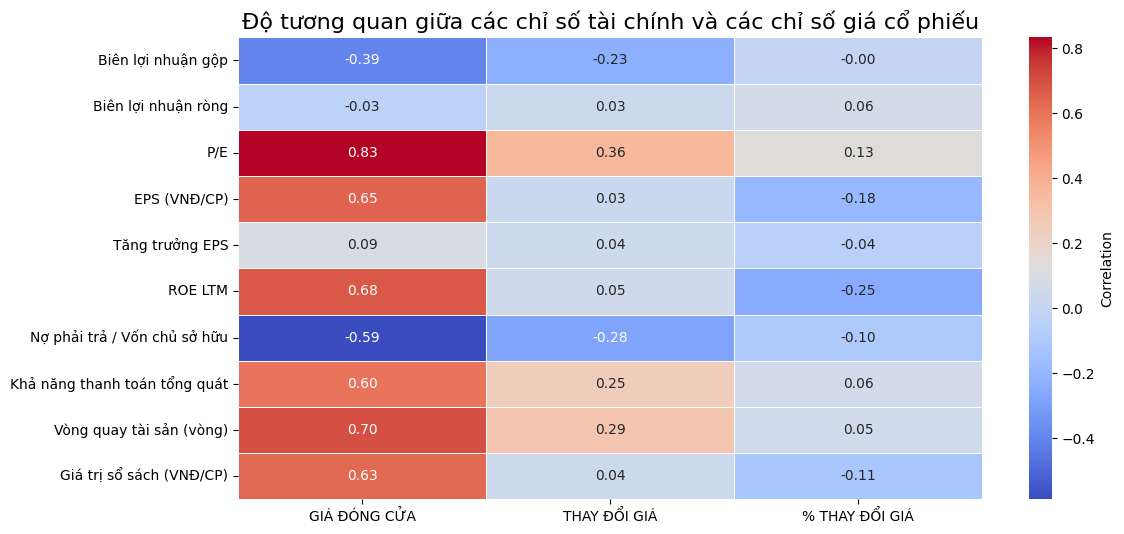

In [15]:
df_combined = pd.merge(df_fi_selected, df_ph_quarter, on='QUÝ', how='inner')

df_fi_numeric = df_combined[['Biên lợi nhuận gộp', 'Biên lợi nhuận ròng', 'P/E', 'EPS (VNĐ/CP)', 
                             'Tăng trưởng EPS', 'ROE LTM', 'Nợ phải trả / Vốn chủ sở hữu', 
                             'Khả năng thanh toán tổng quát', 'Vòng quay tài sản (vòng)', 
                             'Giá trị sổ sách (VNĐ/CP)']]

df_ph_numeric = df_combined[['GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', '% THAY ĐỔI GIÁ']]

correlation_matrix_price = df_fi_numeric.corrwith(df_ph_numeric['GIÁ ĐÓNG CỬA'])
correlation_matrix_change = df_fi_numeric.corrwith(df_ph_numeric['THAY ĐỔI GIÁ'])
correlation_matrix_pct_change = df_fi_numeric.corrwith(df_ph_numeric['% THAY ĐỔI GIÁ'])

correlation_df = pd.DataFrame({
    'GIÁ ĐÓNG CỬA': correlation_matrix_price,
    'THAY ĐỔI GIÁ': correlation_matrix_change,
    '% THAY ĐỔI GIÁ': correlation_matrix_pct_change
})

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title("Độ tương quan giữa các chỉ số tài chính và các chỉ số giá cổ phiếu", fontsize=16)
plt.show()


### Kết luận về mối quan hệ giữa giá cổ phiếu và các chỉ số tài chính

Từ ma trận tương quan trên, ta có thể thấy rõ các chỉ số sau có tương quan mạnh đối với giá cổ phiếu của mỗi quý:

- **P/E**: 0.83 - độ tương quan cao nhất, ảnh hưởng mạnh mẽ tới giá cổ phiếu.
- **EPS (VNĐ/CP)**: 0.65 - mối quan hệ tích cực mạnh, khi EPS tăng, giá cổ phiếu thường tăng.
- **ROE LTM**: 0.68 - mối quan hệ tích cực mạnh.
- **Vòng quay tài sản (vòng)**: 0.70 - mối quan hệ tích cực mạnh.
- **Khả năng thanh toán tổng quát**: 0.60 - mối quan hệ tích cực khá rõ.

Ngược lại, các chỉ số sau có tương quan tiêu cực:

- **Nợ phải trả / Vốn chủ sở hữu**: -0.59 - khi nợ tăng, giá cổ phiếu có xu hướng giảm.
- **Biên lợi nhuận gộp**: -0.39 - mối quan hệ tiêu cực vừa phải.
- **Biên lợi nhuận ròng**: -0.03 - gần như không có mối liên hệ.
- **Tăng trưởng EPS**: 0.09 - mối quan hệ rất yếu.

Nhận xét tổng quan:

- Giá cổ phiếu của công ty phản ánh rõ ràng các chỉ số hiệu quả tài chính (P/E, EPS, ROE, Vòng quay tài sản).
- Các chỉ số nợ và biên lợi nhuận có ảnh hưởng tiêu cực nhưng mức độ yếu hơn.
- Tăng trưởng EPS gần như không có mối quan hệ tuyến tính rõ ràng với giá cổ phiếu.

**Kết luận:**  
➔ Giá cổ phiếu của công ty này có thể có mối quan hệ phụ thuộc chủ yếu vào các chỉ số tài chính sau: **P/E, EPS, ROE, Vòng quay tài sản, Khả năng thanh toán tổng quát**. Các chỉ số về nợ và biên lợi nhuận cũng ảnh hưởng nhưng mức độ thấp hơn, còn tăng trưởng EPS gần như không có tác động rõ ràng.
